# HR Analytics Project- Understanding the Attrition in HR



Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?



HR Analytics





Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.






Attrition in HR








Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.






How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.





Attrition affecting Companies






A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers. 

In [1]:
#Lets Load The dataset
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Users\saura\OneDrive\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv")


In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
data.NumCompaniesWorked.unique()

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3], dtype=int64)

In [6]:
data.shape

(1470, 35)

In [7]:
#Lets check for null values
data.isna().sum().sum()

0

Here we dont have  any null values . we are good to proceed. 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

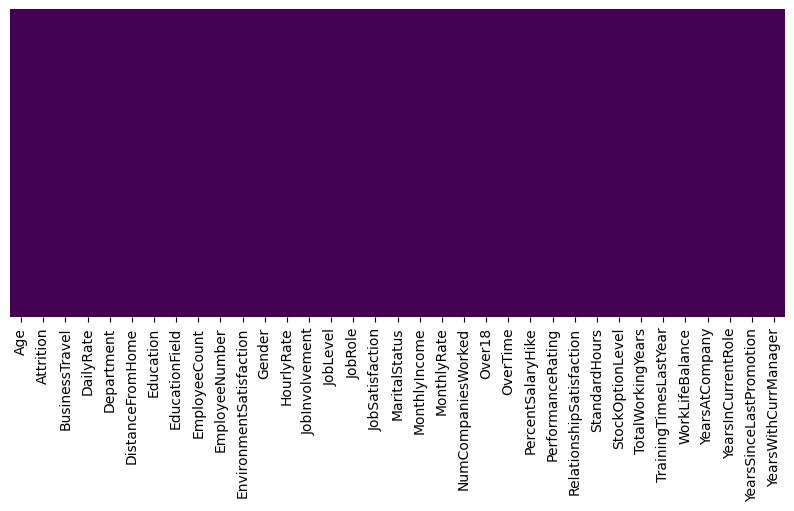

In [9]:
# heatmap to check the missing value
plt.figure(figsize =(10, 4))
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap ='viridis')
plt.show()


In [10]:
#Lets check for duplicates
data.duplicated().sum()

0

We dont have any duplicated we are good to proceed..

In [11]:
#Lets check for the Data Types 
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Here we  have  

Object Column = 9

Left are Integer Columns

In [12]:
#Lets check of info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# EDA

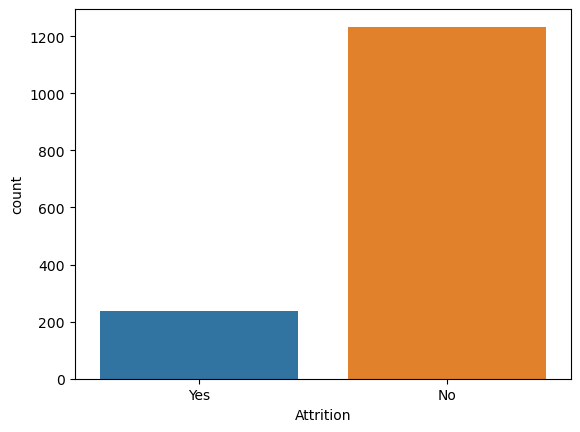

No     1233
Yes     237
Name: Attrition, dtype: int64

In [13]:
#Lets check for attribution
sns.countplot(x='Attrition',data=data)
plt.show()
data.Attrition.value_counts()

So here we can see .
We Have ,

-  No - 1233
-  Yes - 237

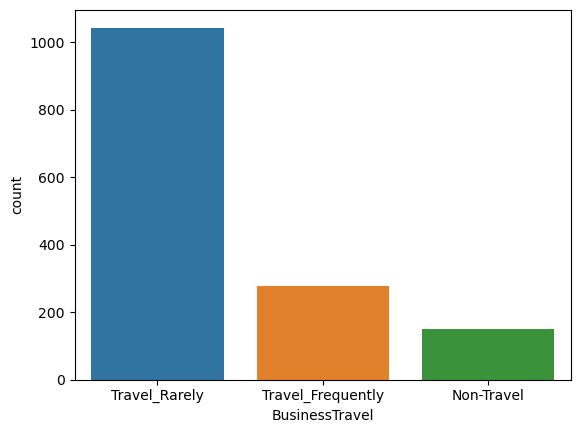

In [14]:
#Lets check for BusinessTravel
sns.countplot(x='BusinessTravel',data=data)
plt.show()

Travel Rarely is High more the 1000 

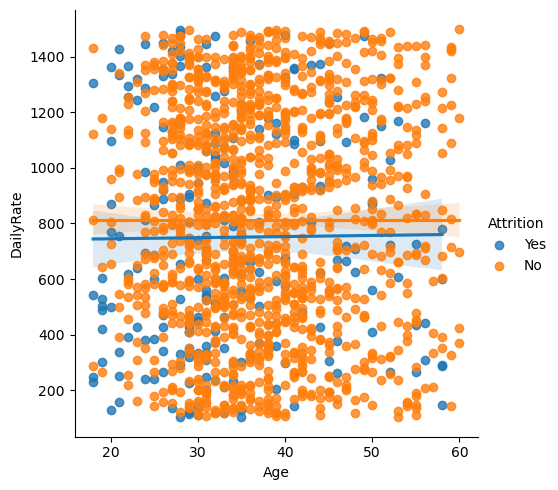

In [15]:
sns.lmplot(x = 'Age', y = 'DailyRate', hue = 'Attrition', data = data)
plt.show()

So , Here we plot Age and Daily rate and Attrition for getting info 

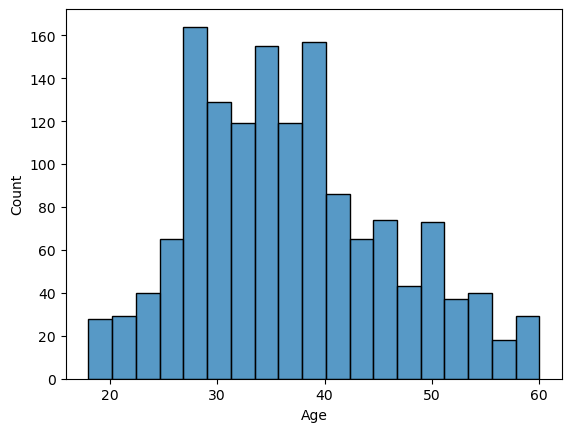

In [16]:
sns.histplot(data['Age'])
plt.show()

Here we can observe maximum employees are from 30 Year Age Groups.

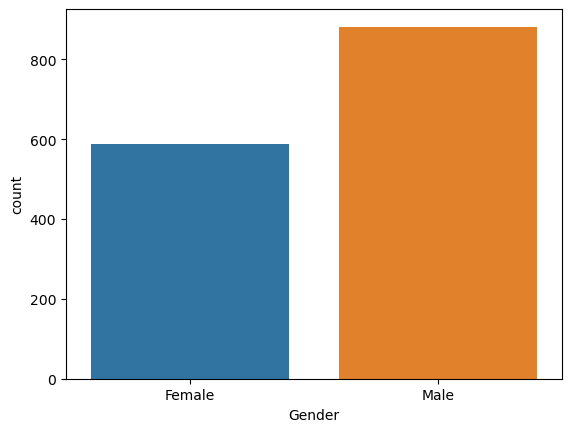

Male      882
Female    588
Name: Gender, dtype: int64

In [17]:
sns.countplot(data['Gender'])
plt.show()
data.Gender.value_counts()

Here We observe there .

Male Employee -> 882 


Female Employee -> 588

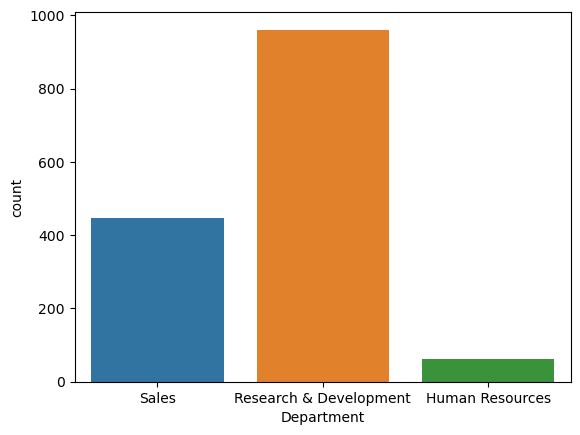

In [18]:
sns.countplot(x='Department',data=data)
plt.show()


Here we can observe that maximum employees is Research and Development Department .

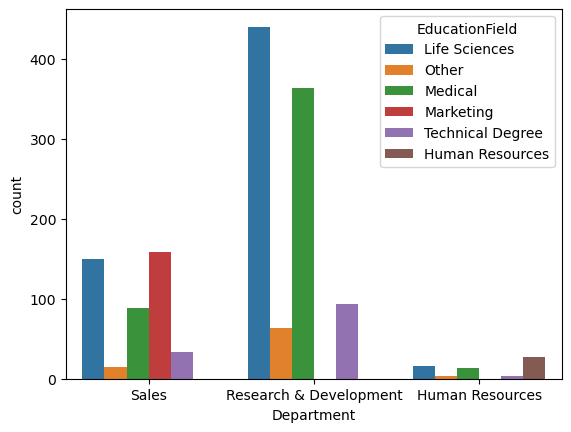

In [19]:
#Lets ploT for educationfiels
sns.countplot(x='Department',hue='EducationField',data=data)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

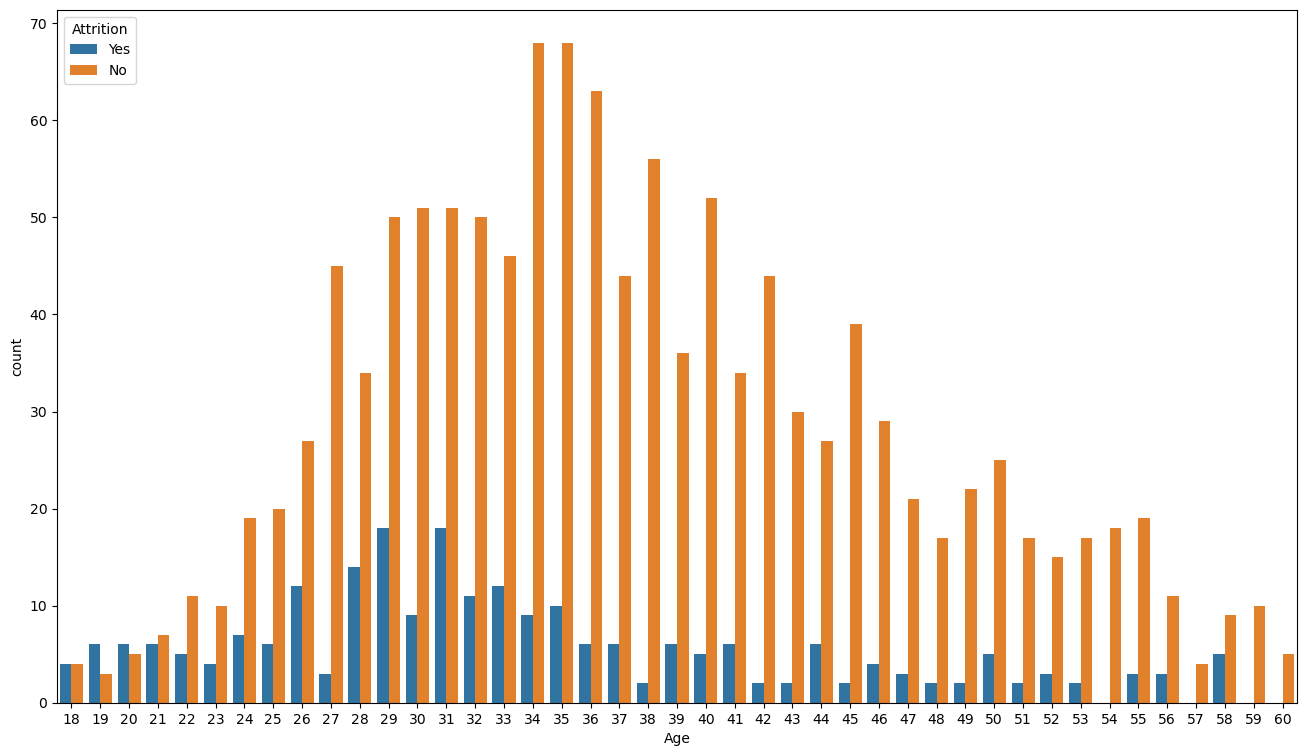

In [20]:
#Lets plot Age and Attrition
plt.figure(figsize = (16,9))
sns.countplot('Age', hue='Attrition', data=data)


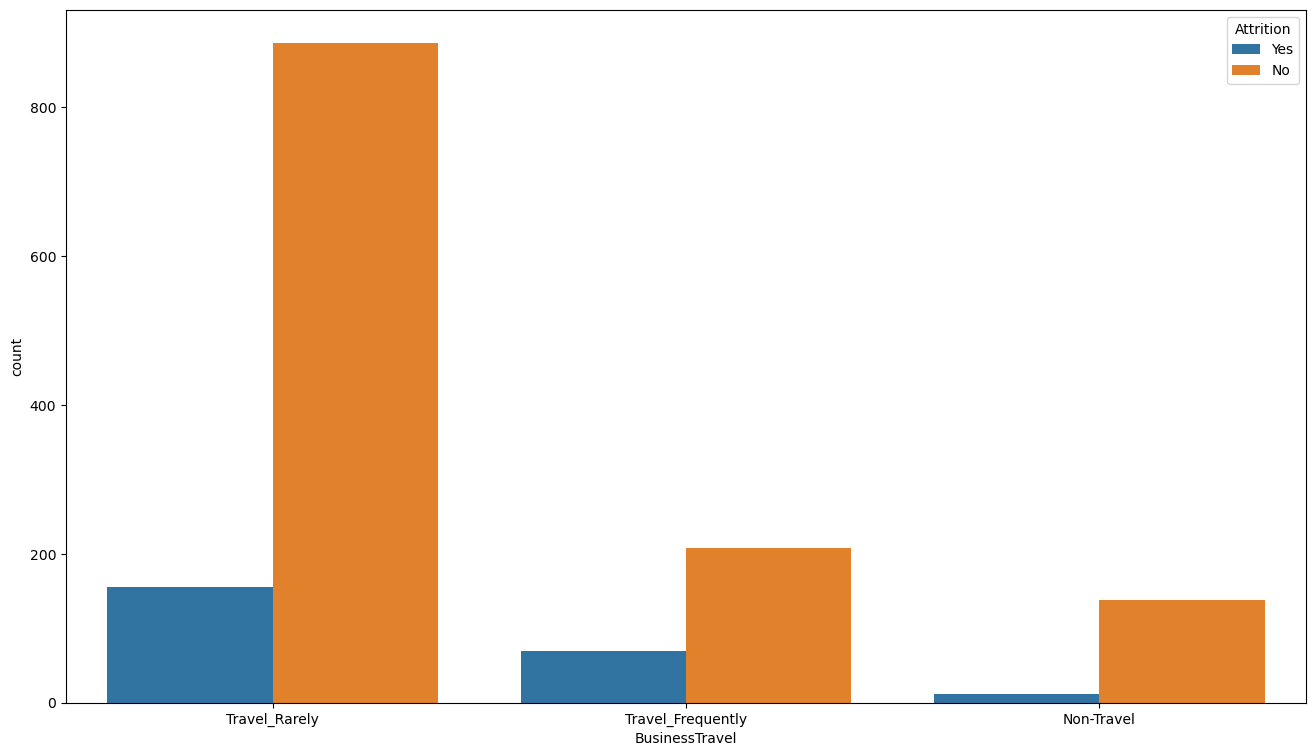

In [21]:
#Lets plot BusinessTravel and Attrition
plt.figure(figsize = (16,9))
sns.countplot('BusinessTravel', hue='Attrition', data=data)
plt.show()

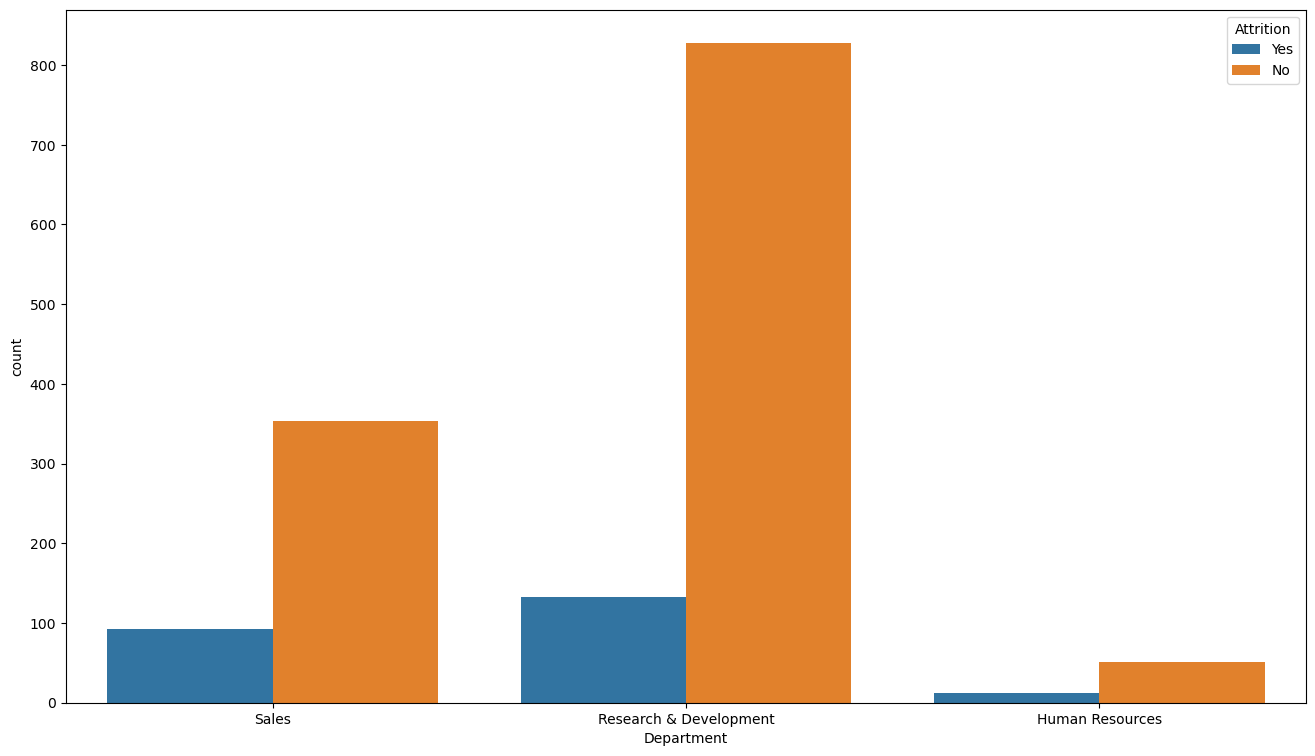

In [22]:
#Lets plot Department and Attrition
plt.figure(figsize = (16,9))
sns.countplot('Department', hue='Attrition', data=data)
plt.show()

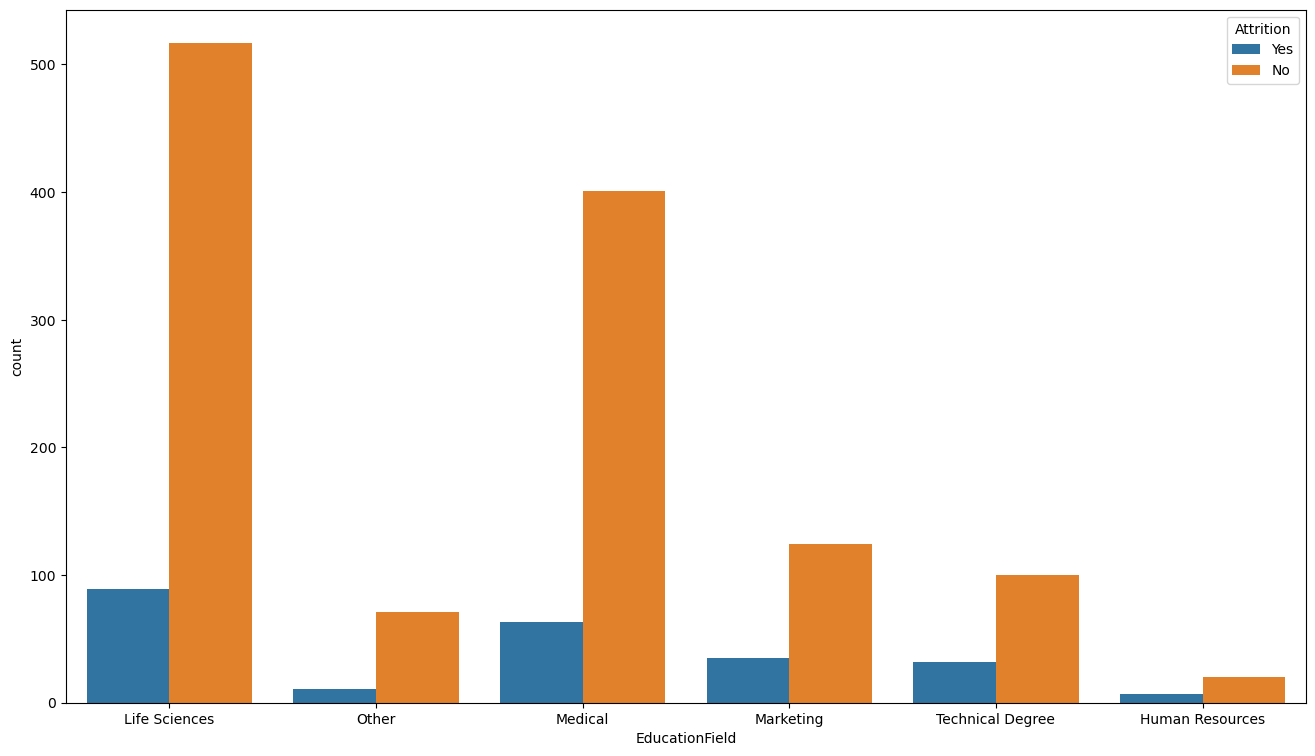

In [23]:
#Lets plot for Education Field and Attrition
plt.figure(figsize = (16,9))
sns.countplot('EducationField', hue='Attrition', data=data)
plt.show()

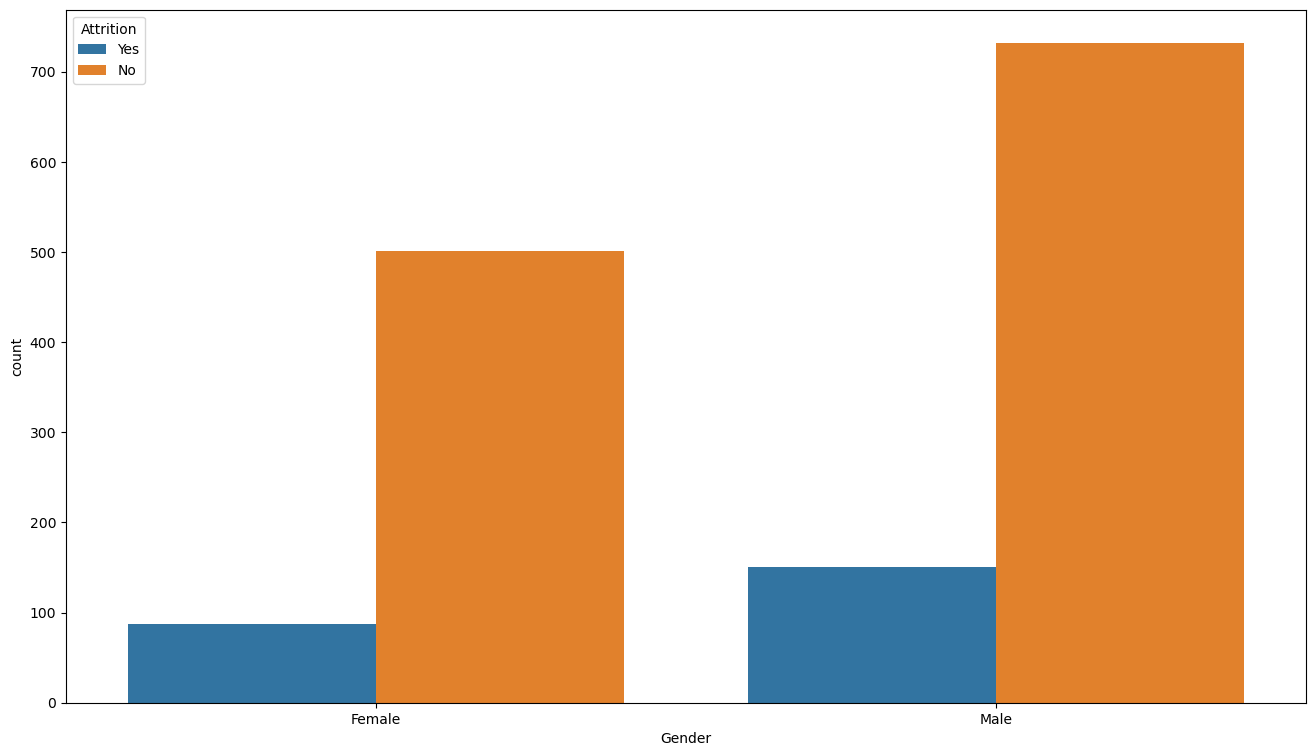

In [24]:
#Lets plot Gender and Attirition
plt.figure(figsize = (16,9))
sns.countplot('Gender', hue='Attrition', data=data)
plt.show()

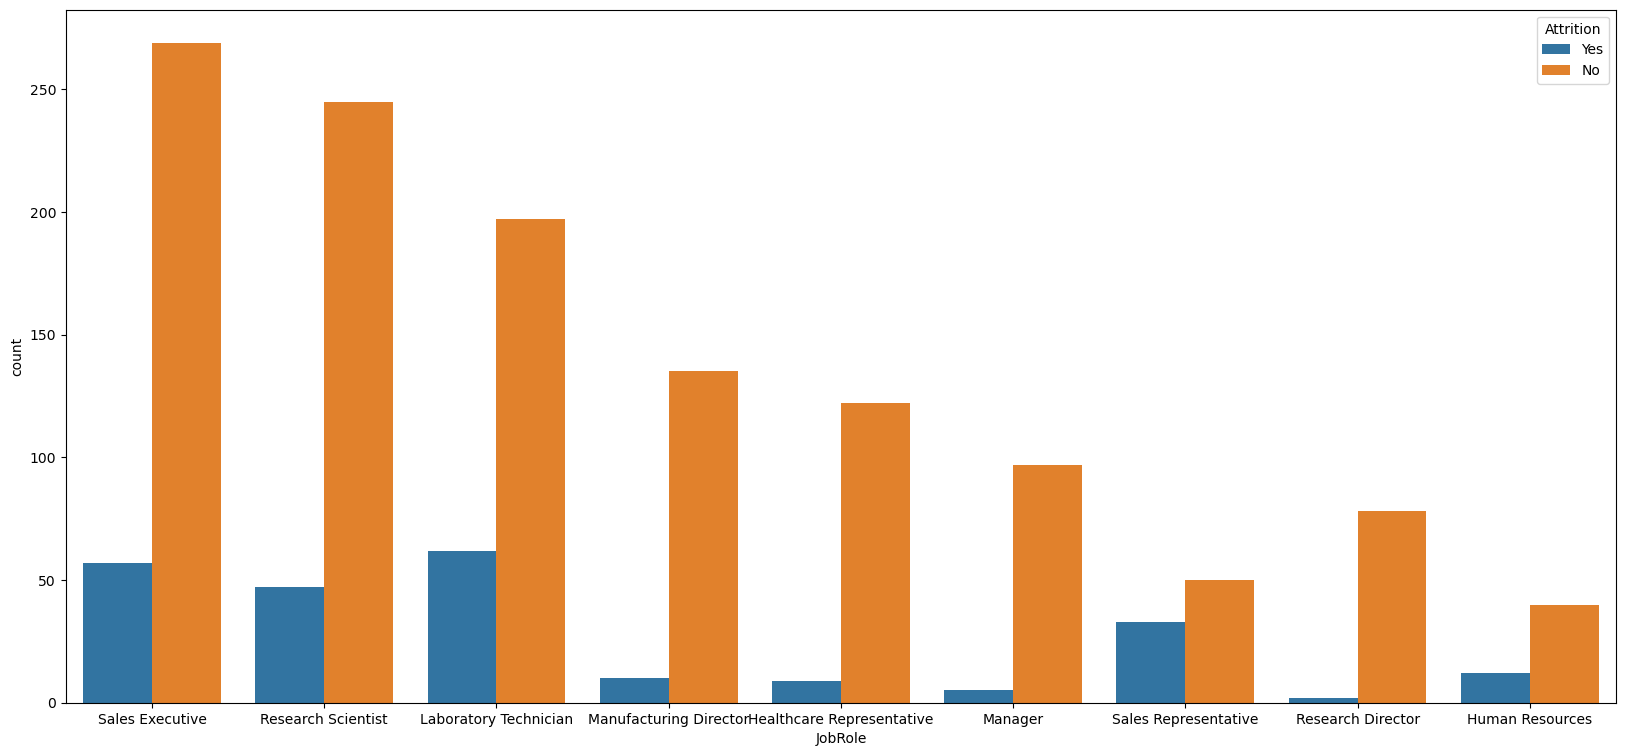

In [25]:
#Lets plot for jobrole and attrition
plt.figure(figsize = (20,9))
sns.countplot('JobRole', hue='Attrition', data=data)
plt.show()

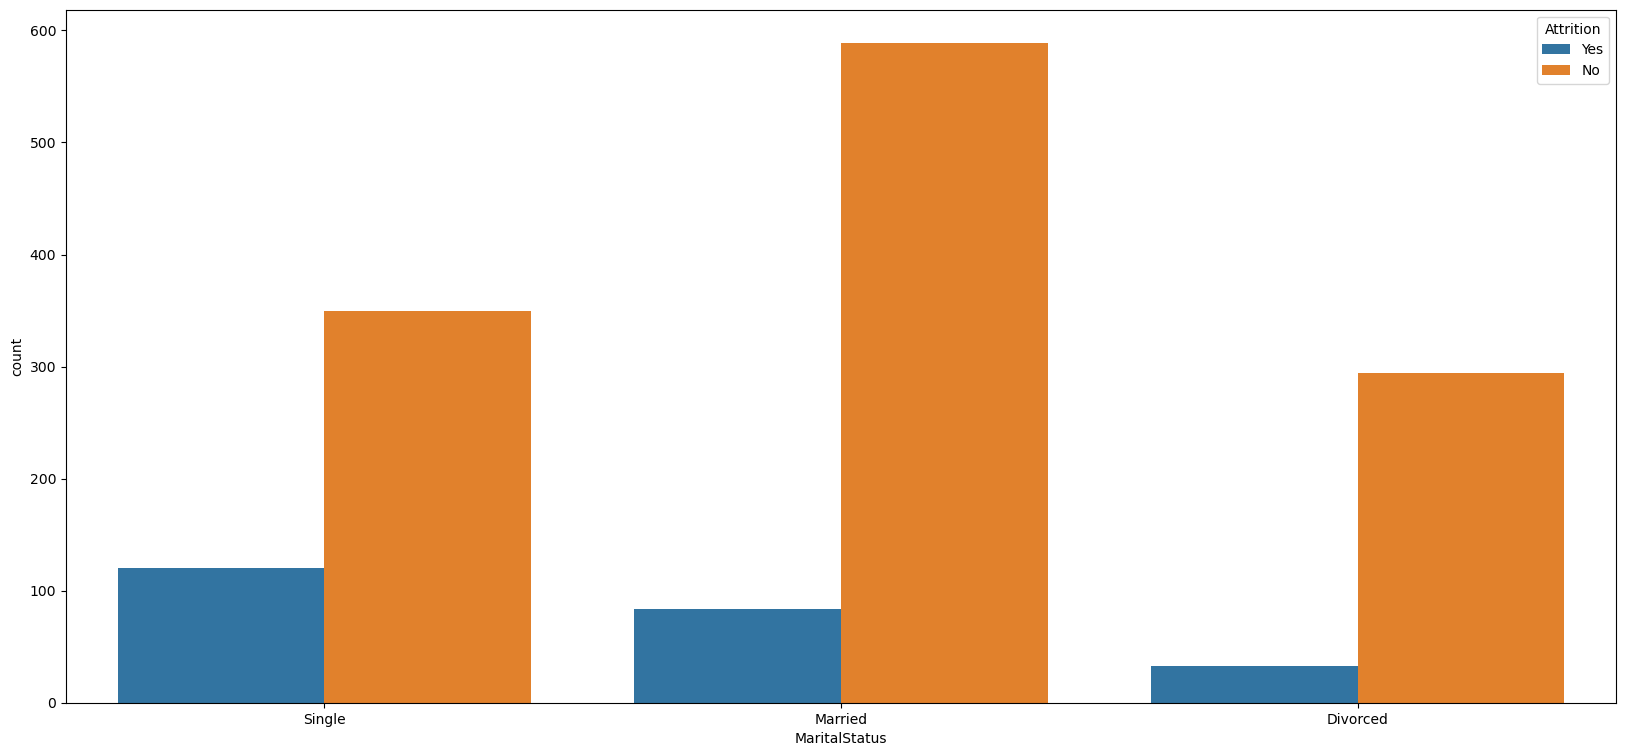

In [26]:
#Lets plot for martial status and attrition
plt.figure(figsize = (20,9))
sns.countplot('MaritalStatus', hue='Attrition', data=data)
plt.show()

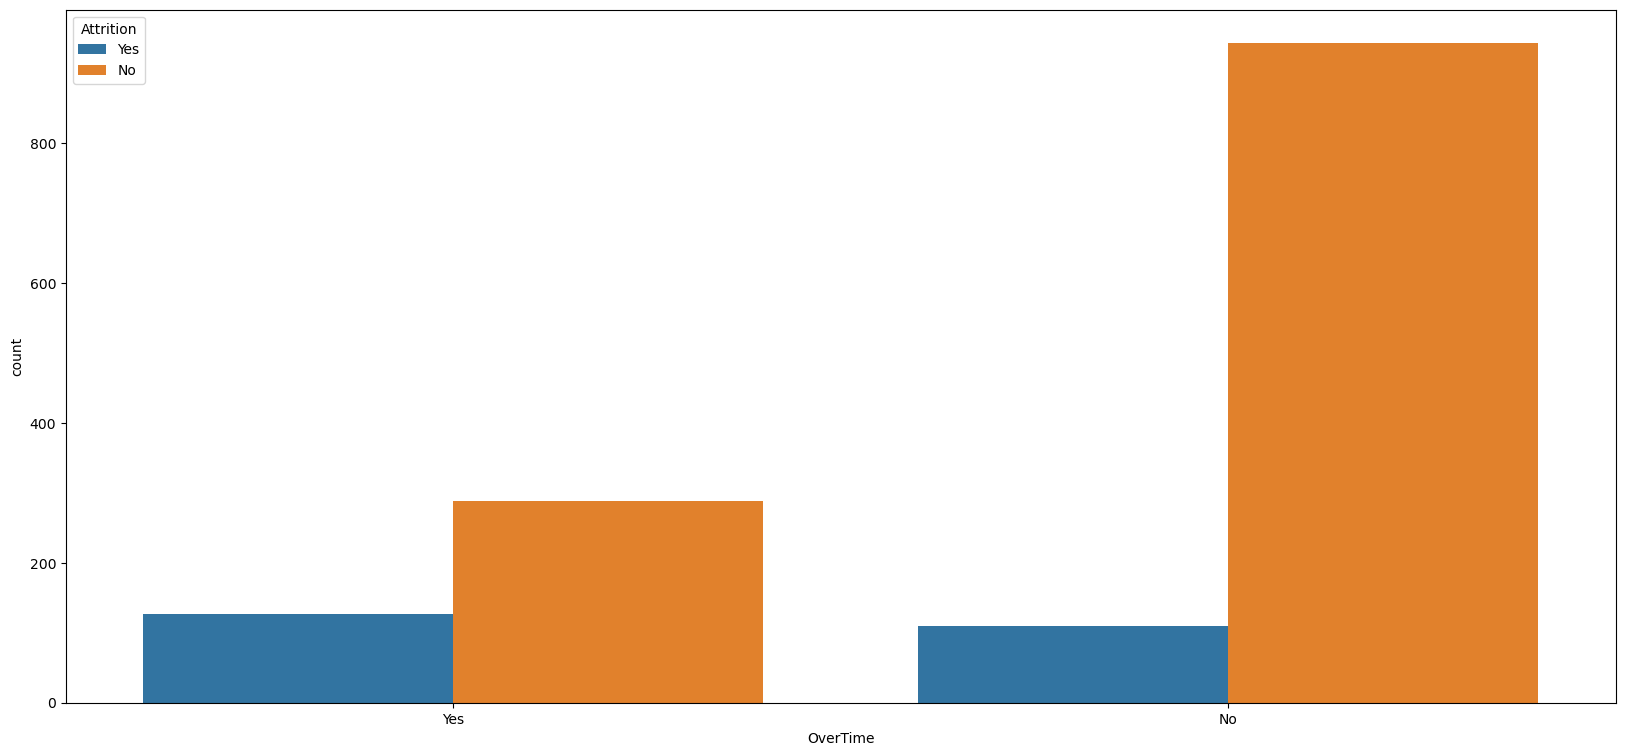

In [27]:
#Lets plot for overtime and attrition
plt.figure(figsize = (20,9))
sns.countplot('OverTime', hue='Attrition', data=data)
plt.show()

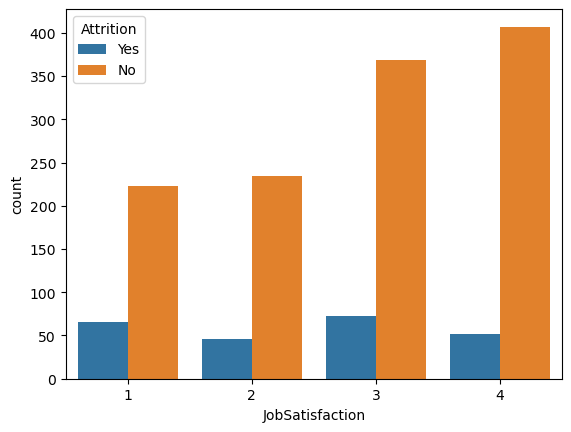

In [28]:
#Count plot for the Job Satisfaction variable
sns.countplot(x='JobSatisfaction',hue='Attrition',data=data)
plt.show()


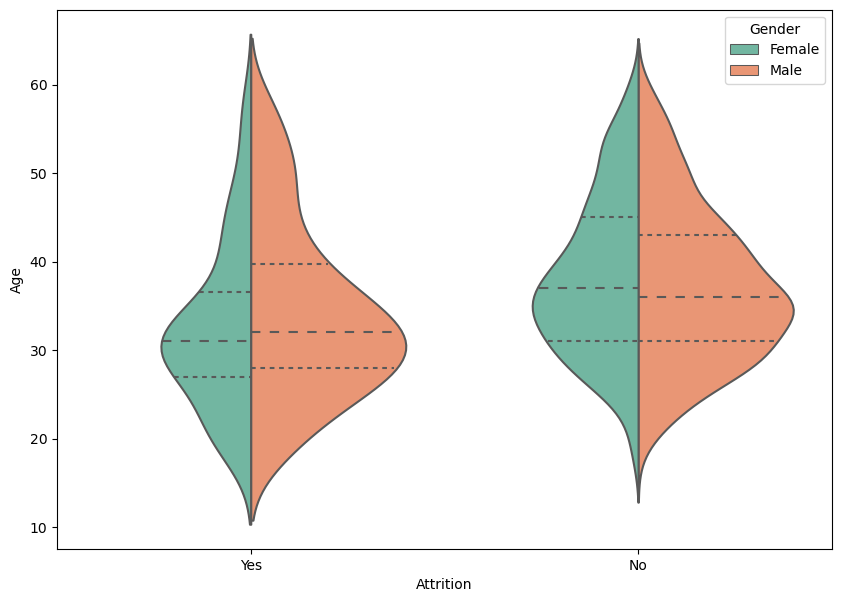

In [29]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="Age", hue="Gender", data=data, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()


from above we can say that both male and female has wide range in age between 20 and 30

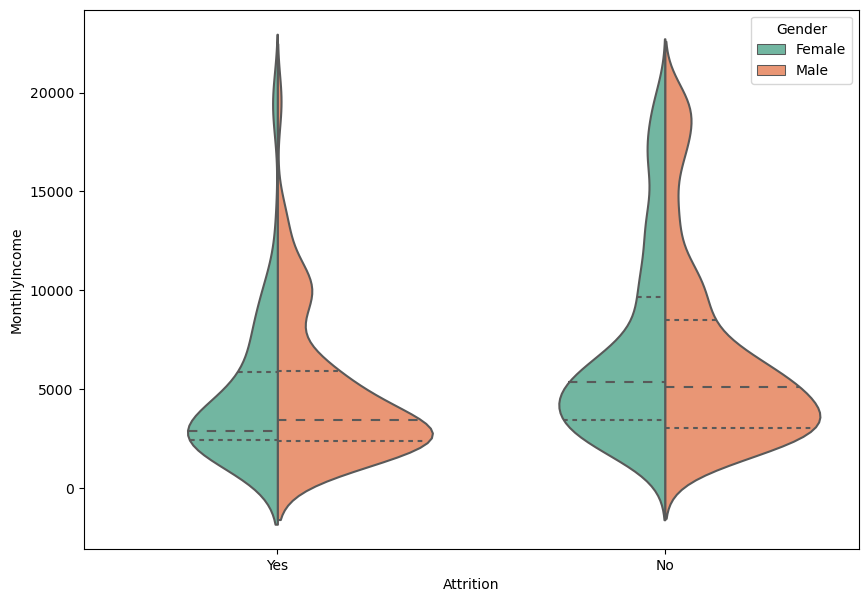

In [30]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="MonthlyIncome", hue="Gender", data=data, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()


from above we have observation that most of male and female are having Monthlyincome less than 5000

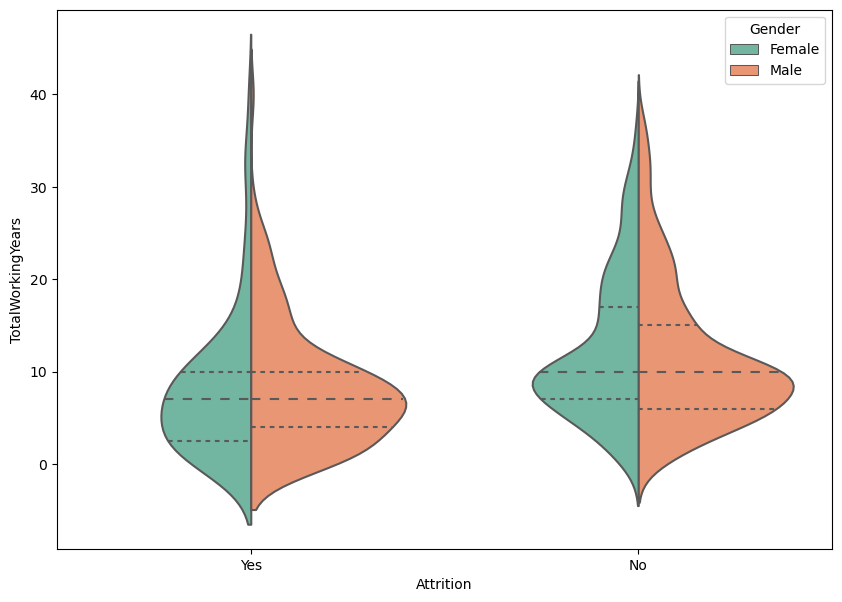

In [31]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="TotalWorkingYears", hue="Gender", data=data, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()



from the above observation male and female mostly have Totlaworkexperienve in between range 0 to 10 years

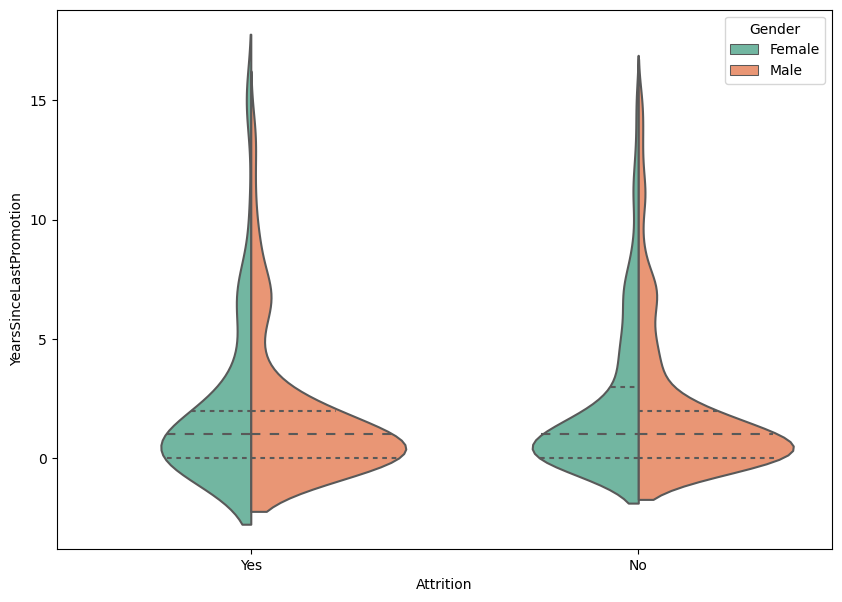

In [32]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="YearsSinceLastPromotion", hue="Gender", data=data, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()


from above plot we have that for both male and female mostly are less than 5 years since they have got promoted

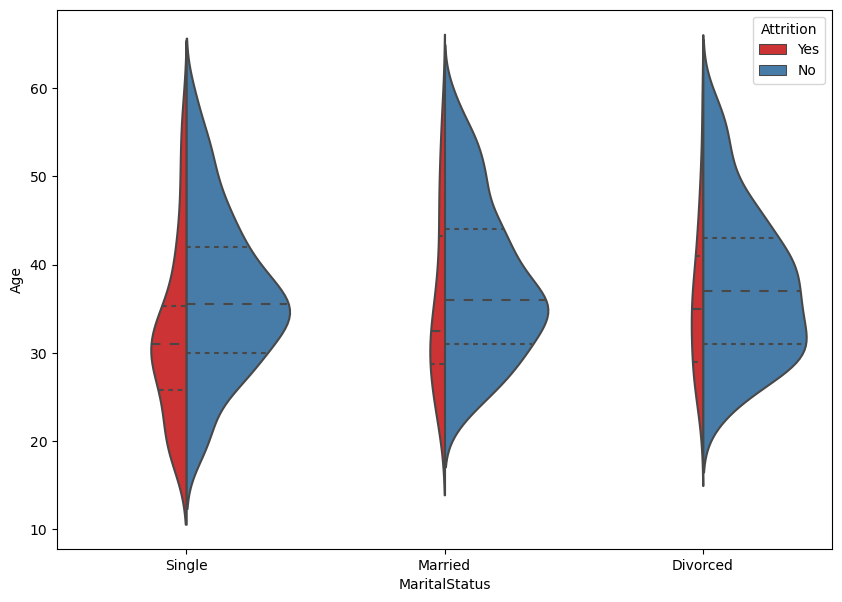

In [33]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="Age", hue="Attrition", data=data, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

in this plot we can see that there is some Attrition when you are single and less when you are married but little when you are divorced.

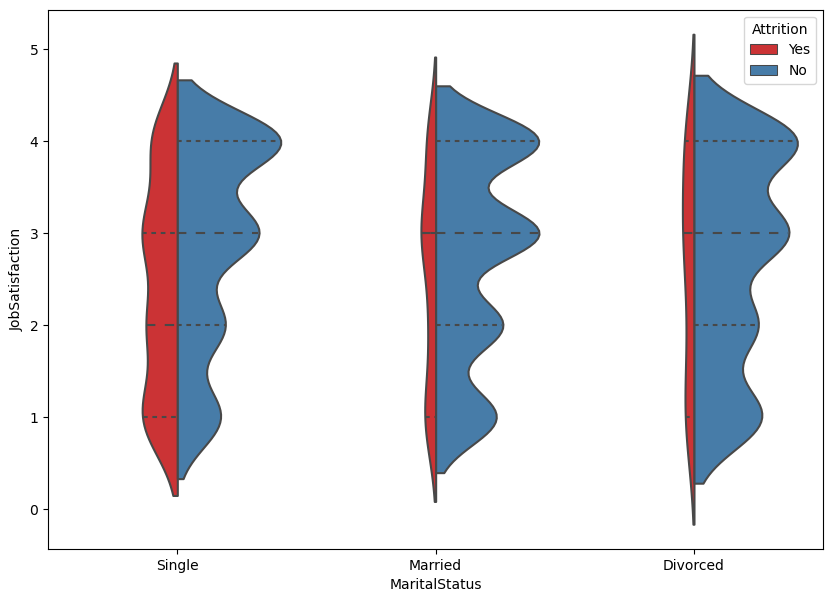

In [34]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="JobSatisfaction", hue="Attrition", data=data, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

above plot showing single are more satisfied with their job other than they are married or divorced.

In [35]:
#Lets take numerical columns and assign in new variable
integer_datatypes=[]
for x in data.dtypes.index:
    if data.dtypes[x]=='int64':
        integer_datatypes.append(x)
integer_datatypes    

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

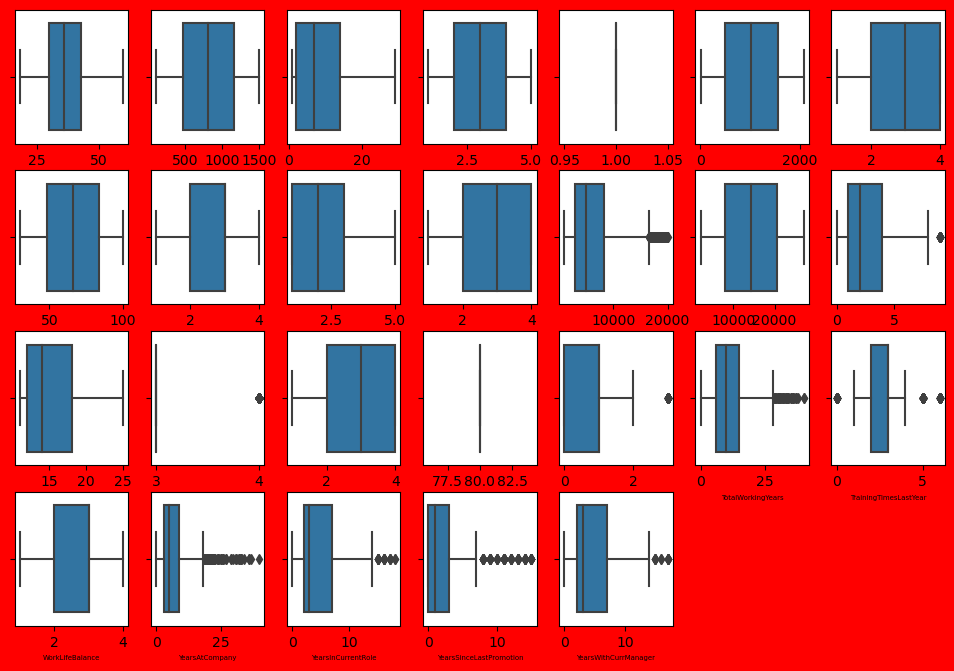

In [36]:
#Lets check if Outliers
plt.figure(figsize=(12,8),facecolor='red')
plotnumber =1
for col in data[integer_datatypes]:
    if plotnumber <= 28:
        ax=plt.subplot(4,7,plotnumber)
        sns.boxplot(data[col])
        plt.xlabel(col,fontsize=5)
    plotnumber +=1
plt.show()
        

Here we can see that lots of columns have outliers. So we have to remove this by using z score

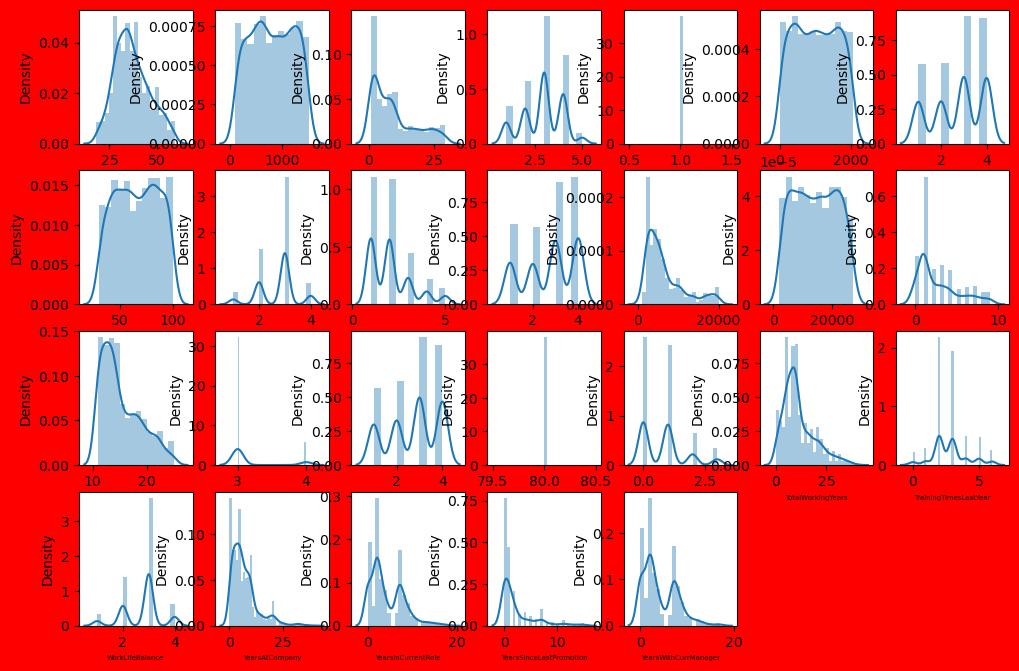

In [37]:
#Lets check for distribution plot
plt.figure(figsize=(12,8),facecolor='red')
plotnumber =1
for col in data[integer_datatypes]:
    if plotnumber <= 28:
        ax=plt.subplot(4,7,plotnumber)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=5)
    plotnumber +=1
plt.show()

Out dataset have normal distributed becasue maximum columns have numbers but act like a categorical columns

# Data Preprocessing

In our dataset there are twp type of datatypes - Object and Integer .

Finding datas with Object type .

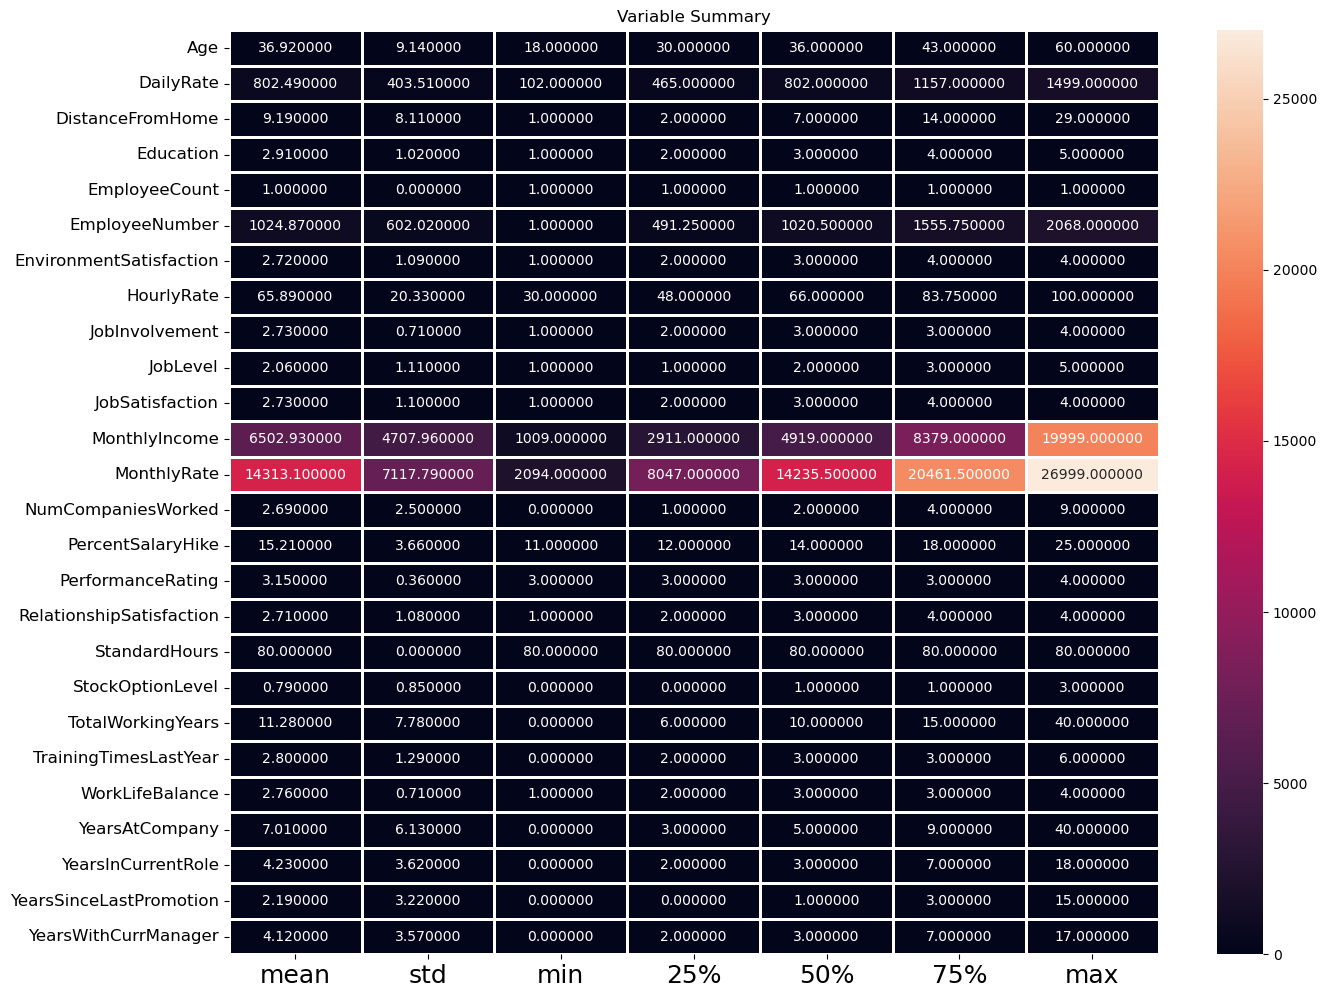

In [38]:
#Lets describe the dataset
plt.figure(figsize=(15,12))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

# Observation

- Here we dont have any Null Values .
- May be our dataset in normally distributed
- Here we can observe that we have 2 unnecessory columns 'EmployeeCount','EmployeeNumber'

In [39]:
#Lets drop 
data.drop(columns=['EmployeeNumber','EmployeeCount'],inplace=True)

# Encoding of DataFrame

In [40]:
# Lets import ordinal encoder .
from sklearn.preprocessing import LabelEncoder #We use ordinal encoder because coutry column has follow some order in Rank.

enc=LabelEncoder()#Here we assigning the name

for i in data.columns: #Here we run the loop for iterate every column.
    if data[i].dtypes=='object':#Here we set . only apply label encoder on object data type
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))# here we applying method
data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,80,1,10,3,3,10,7,1,7


Here our Attrition -> 1 For Yes and 0 for No

# Describe the Datset with colors

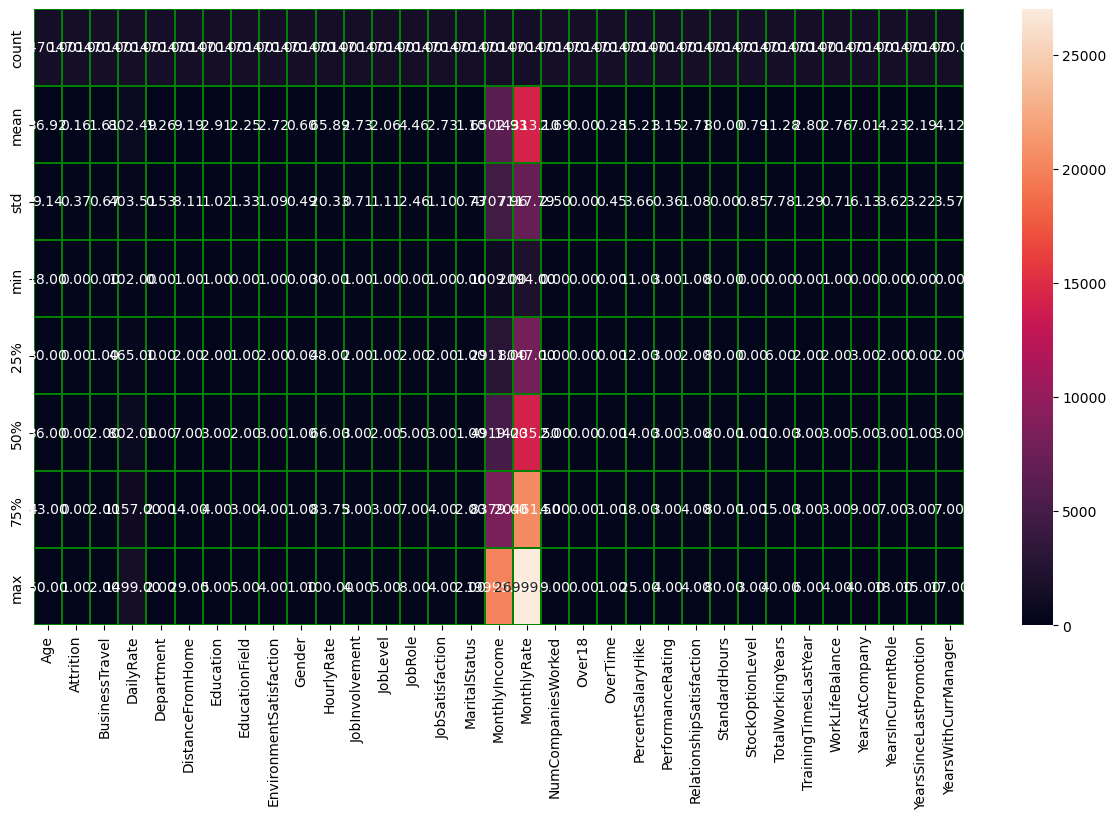

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.heatmap(data.describe(),annot=True,linewidths=0.2,linecolor='green',fmt="0.2f")
plt.show()

In [42]:
#Lets check the info of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

So , Here we confirm that we encode all object data to int64 

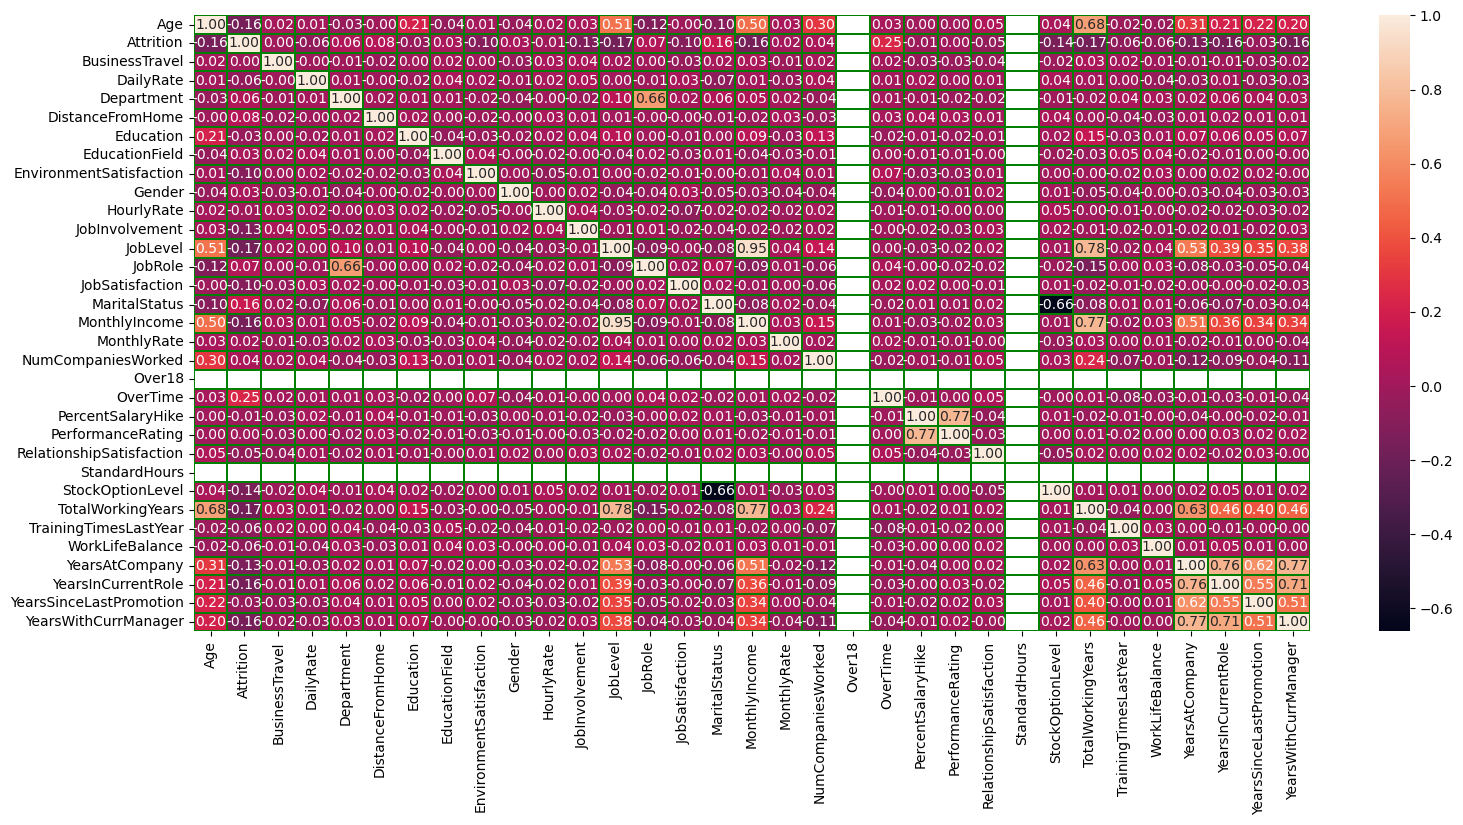

In [43]:
#Here wee see the corelation with the use of heatmap.
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot=True,linewidth=0.1,linecolor='green',fmt="0.2f")
plt.show()

Here we can see that Job level and Monthly income has 95% relationship . May be its create multicollinearity 

Job Role and Department have 66% correlation.

Total Working Years and Age has 68 % relatiuonship.

Stock Option Level and Martial Status have 66% Relationship

Job Level and Total Working Years have 78 % relationship


Monthly income and Total Working Year have 77% relationship



May be all the columns create multicollinearity problem.

# Correlation of the columns with the target columns.

In [44]:
data.corr()['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
JobRole                     0.067151
D

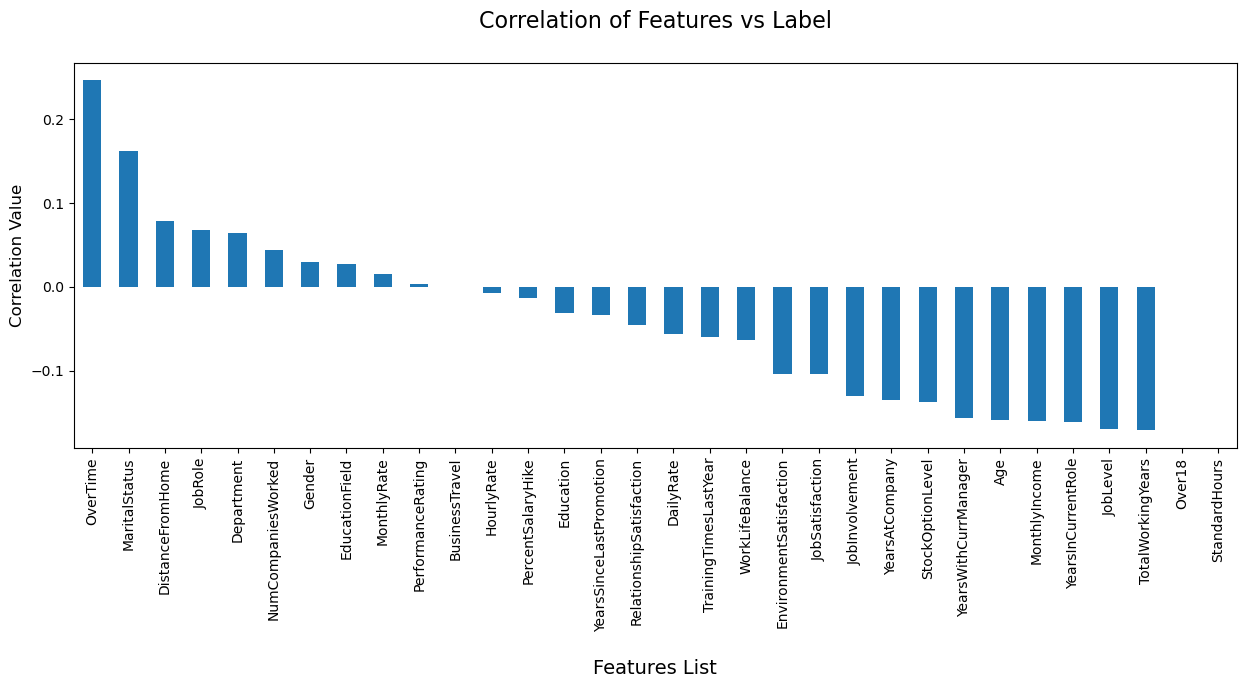

In [45]:
#Lets plot in Bar plot
df_corr = data.corr()
plt.figure(figsize=(15,5))
df_corr['Attrition'].sort_values(ascending=False).drop('Attrition').plot.bar()
plt.title("Correlation of Features vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()


So , We can see that maximum columns have negative correlations . and few columns have positive correlation.

# Using Z Score to remove outliers

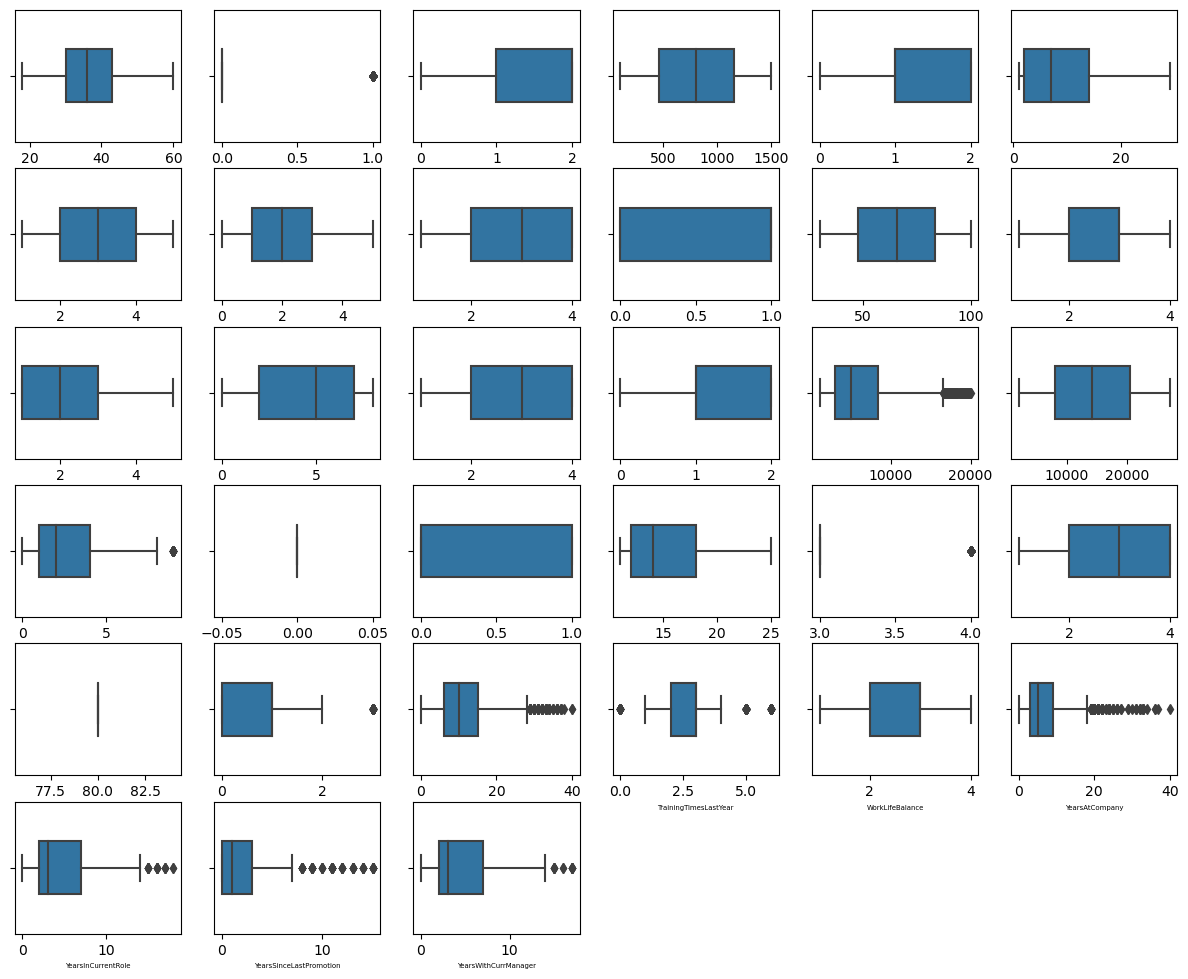

In [46]:
#Lets check if Outliers
plt.figure(figsize=(15,12))
plotnumber =1
for col in data:
    if plotnumber <= 36:
        ax=plt.subplot(6,6,plotnumber)
        sns.boxplot(data[col],width=0.4)
        plt.xlabel(col,fontsize=5)
    plotnumber +=1
plt.show()
        

In [47]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

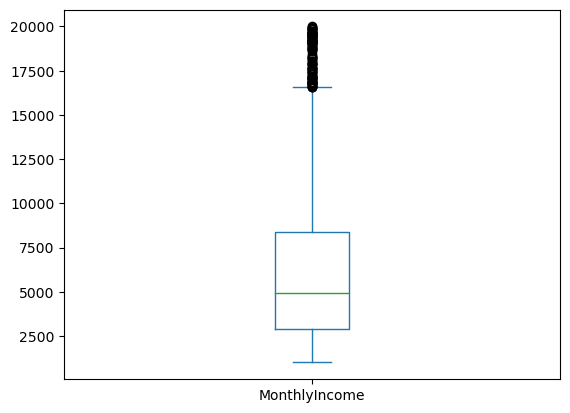

In [48]:
#Lets plot agian Monthly Income
data['MonthlyIncome'].plot.box()
plt.show()

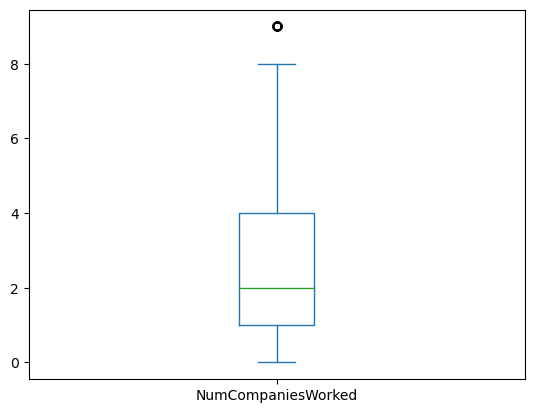

In [49]:
#Lets plot agian NumCompaniesWorked
data['NumCompaniesWorked'].plot.box()
plt.show()

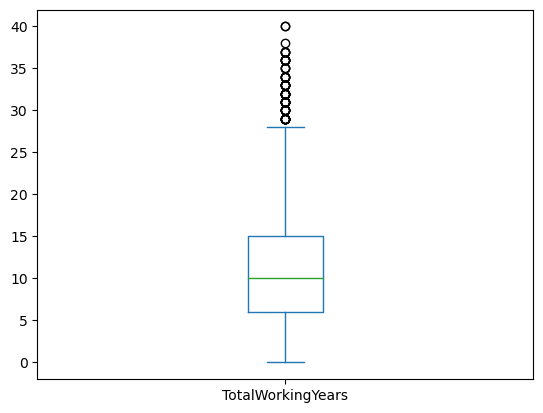

In [50]:
#Lets plot agian StockOptionLevel
data['TotalWorkingYears'].plot.box()
plt.show()

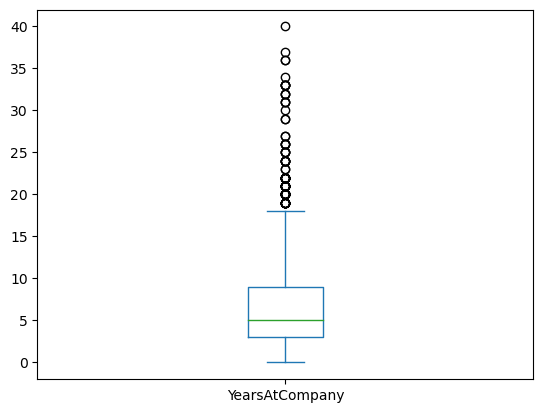

In [51]:
#Lets plot agian StockOptionLevel
data['YearsAtCompany'].plot.box()
plt.show()

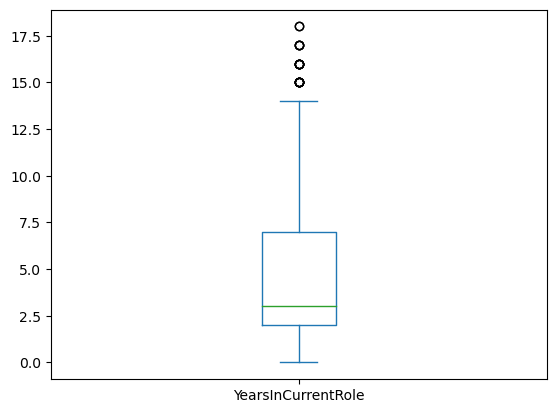

In [52]:
#Lets plot agian StockOptionLevel
data['YearsInCurrentRole'].plot.box()
plt.show()

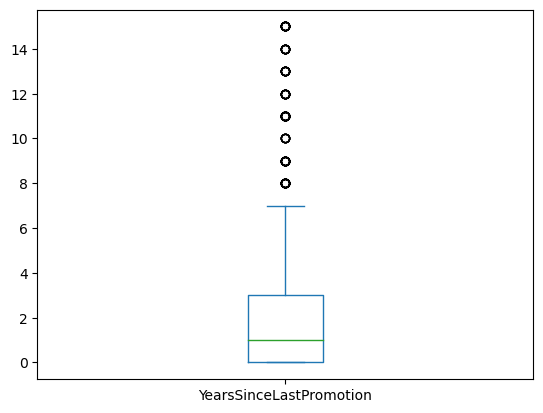

In [53]:
#Lets plot agian StockOptionLevel
data['YearsSinceLastPromotion'].plot.box()
plt.show()

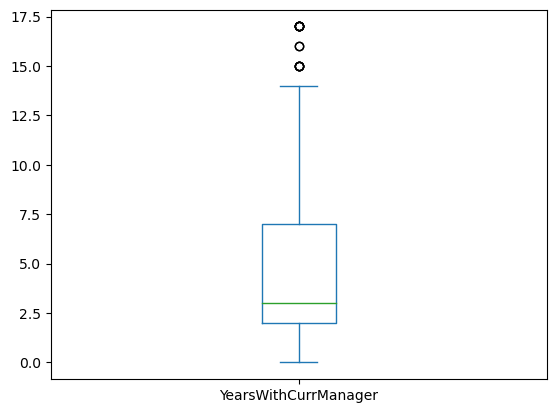

In [54]:
#Lets plot agian StockOptionLevel
data['YearsWithCurrManager'].plot.box()
plt.show()

In [55]:
#Lets handle the outliers by zscore
#lets import zscore
from scipy.stats import zscore
import numpy as np

In [56]:
z = np.abs(zscore(data[['MonthlyIncome','NumCompaniesWorked','TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']]))
threshold = 3
df1 = data[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", data.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (data.shape[0]-df1.shape[0])/data.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe na

Shape of the dataframe before removing outliers:  (1470, 33)
Shape of the dataframe after removing outliers:  (1396, 33)
Percentage of data loss post outlier removal:  5.034013605442176


# Lets Check By Plotting

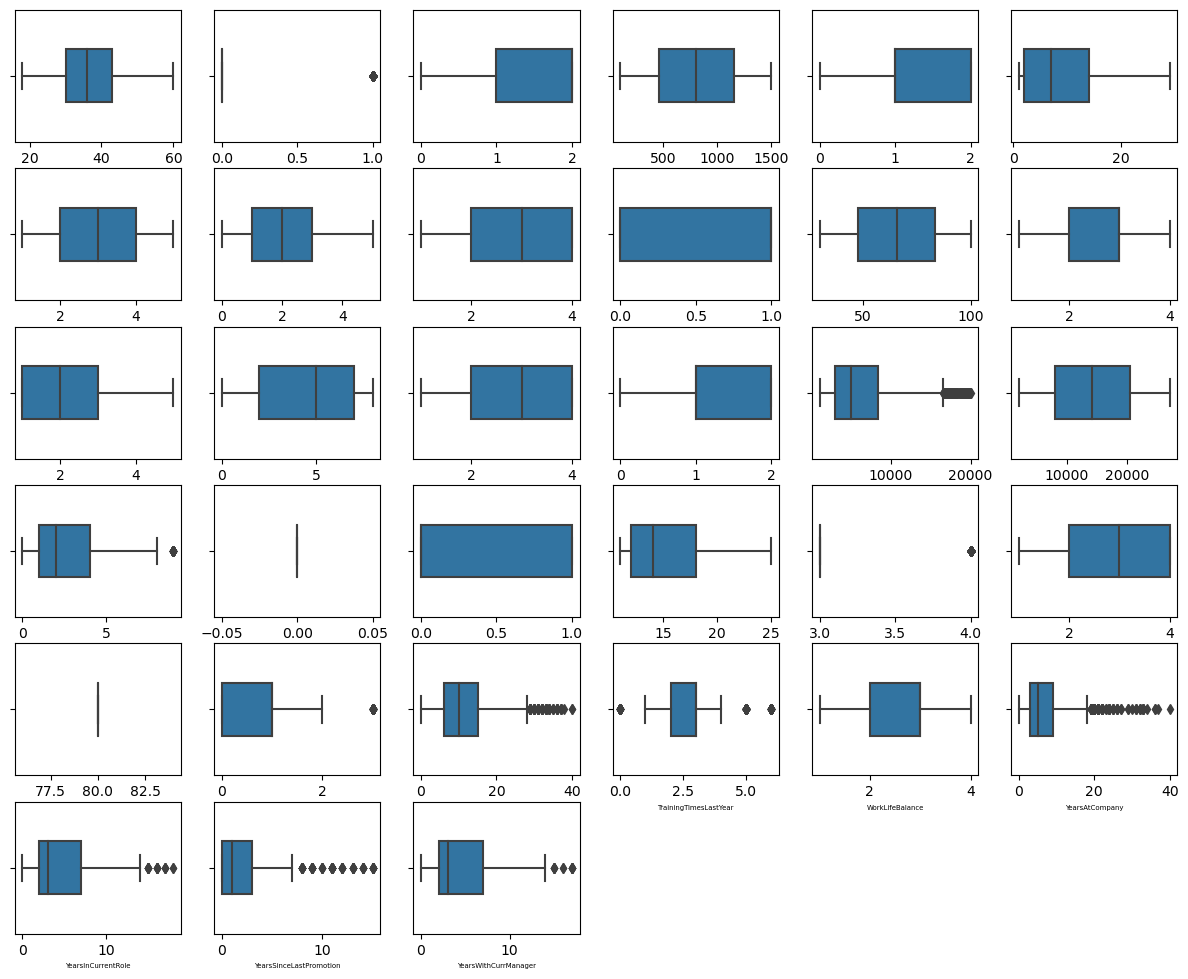

In [57]:
#Lets check if Outliers
plt.figure(figsize=(15,12))
plotnumber =1
for col in data:
    if plotnumber <= 36:
        ax=plt.subplot(6,6,plotnumber)
        sns.boxplot(data[col],width=0.4)
        plt.xlabel(col,fontsize=5)
    plotnumber +=1
plt.show()
        

So here we can see that we remove some outliers using z score.

In [58]:
#Lets check Skewness
data.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
T

So here we can see that we few column have skewed

# Using Log Transform to fix skewness

In [59]:
for col in data:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])


I have applied Log Transformation on our numerical integer datatype columns to ensure that we do not have skewness in our datase

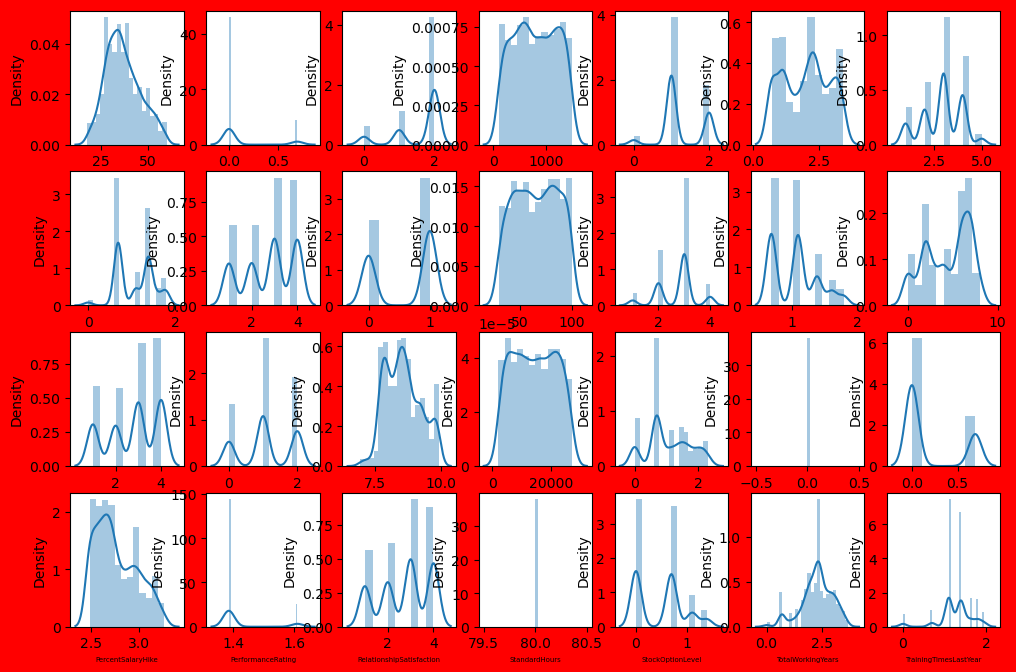

In [60]:
#Lets check for distribution plot
plt.figure(figsize=(12,8),facecolor='red')
plotnumber =1
for col in data:
    if plotnumber <= 28:
        ax=plt.subplot(4,7,plotnumber)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=5)
    plotnumber +=1
plt.show()

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [61]:
X = df.drop('Attrition', axis=1)
Y = df['Attrition']

# Resolving the class imbalance issue in label column

In [62]:
Y.value_counts()

0    1167
1     229
Name: Attrition, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)


SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [65]:
Y.value_counts()

1    1167
0    1167
Name: Attrition, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

# Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.696303,0.753672,0.859911,1.520719,-1.117617,-0.746508,-0.895784,-0.436073,-1.029572,1.529785,...,-1.406958,0.0,-0.742746,-0.165953,-2.158385,-2.202681,0.156163,0.219969,-0.685244,0.591700
1,1.615518,-0.793443,-1.329271,-0.374293,-0.202898,-1.772626,-0.895784,0.491725,0.971278,-0.231405,...,1.451869,0.0,0.516200,0.149980,0.328535,0.520337,1.061149,1.187444,-0.257836,1.250588
2,0.236696,0.753672,1.580772,-0.374293,-0.986943,-0.746508,1.503711,1.419523,0.971278,1.423046,...,-0.454015,0.0,-0.742746,-0.323920,0.328535,0.520337,-1.201317,-1.069998,-0.685244,-1.055519
3,-0.222912,-0.793443,1.631312,-0.374293,-0.856269,1.305729,-0.895784,1.419523,-1.029572,-0.498251,...,0.498927,0.0,-0.742746,-0.165953,0.328535,0.520337,0.608656,1.187444,0.596979,-1.055519
4,-0.912323,0.753672,-0.499350,-0.374293,-0.986943,-1.772626,0.703879,-1.363871,0.971278,-1.352162,...,1.451869,0.0,0.516200,-0.481886,0.328535,0.520337,-0.748824,-0.425015,0.169571,-0.396631


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Finding best random state for building Random Forest Models

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [79]:
rf=RandomForestClassifier()

In [80]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    x_pred=rf.predict(x_train)
    y_pred=rf.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 1.0
 At random state 0 , the testing accuracy is :- 0.9250535331905781
 At random state 0 , the testing accuracy is :- [[225  16]
 [ 19 207]]


 At random state 1 , the testing accuracy is :- 1.0
 At random state 1 , the testing accuracy is :- 0.9100642398286938
 At random state 1 , the testing accuracy is :- [[235  18]
 [ 24 190]]


 At random state 2 , the testing accuracy is :- 1.0
 At random state 2 , the testing accuracy is :- 0.9100642398286938
 At random state 2 , the testing accuracy is :- [[206  22]
 [ 20 219]]


 At random state 3 , the testing accuracy is :- 1.0
 At random state 3 , the testing accuracy is :- 0.9014989293361885
 At random state 3 , the testing accuracy is :- [[216  23]
 [ 23 205]]


 At random state 4 , the testing accuracy is :- 1.0
 At random state 4 , the testing accuracy is :- 0.9250535331905781
 At random state 4 , the testing accuracy is :- [[219  17]
 [ 18 213]]


 At random state 5 , the testing accurac

Here i am seleting 46 Random State  

In [82]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=46)

In [86]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [99]:
from sklearn.model_selection import cross_val_score

In [105]:
#write one fucntion and call as many times to check accuracy_score of different models 

def metrics_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("======================Training Score===================")
        print("Accuracy Score  ==> ",accuracy_score(y_train,y_pred))
    elif train==False:
        pred=clf.predict(x_test)
        print("======================Testing Score====================")
        print("Accuracy Score==>  ",accuracy_score(y_test,pred))
        print("Classification Report==> ",classification_report(y_test,pred))
        print("Confusion Matrix==> ",confusion_matrix(y_test,pred))
        cv_score = (cross_val_score(clf, X, Y, cv=5).mean())*100
        print("Cross Validation Score:", cv_score)

In [124]:
#Check Score
metrics_score(rf,x_train,x_test,y_train,y_test,train=True)
metrics_score(rf,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.9887520085698982
======================Testing Score====================
Accuracy Score==>   0.987152034261242
Classification Report==>                precision    recall  f1-score   support

           0       0.98      0.99      0.99       216
           1       0.99      0.98      0.99       251

    accuracy                           0.99       467
   macro avg       0.99      0.99      0.99       467
weighted avg       0.99      0.99      0.99       467

Confusion Matrix==>  [[214   2]
 [  4 247]]
Cross Validation Score: 90.31862587422226


# Finding best random state for building LogisticRegression Models

In [90]:
from sklearn.linear_model import LogisticRegression

In [92]:
lr=LogisticRegression()

In [95]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    x_pred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.8296732726298875
 At random state 0 , the testing accuracy is :- 0.8394004282655246
 At random state 0 , the testing accuracy is :- [[194  47]
 [ 28 198]]


 At random state 1 , the testing accuracy is :- 0.8361006963042313
 At random state 1 , the testing accuracy is :- 0.8436830835117773
 At random state 1 , the testing accuracy is :- [[217  36]
 [ 37 177]]


 At random state 2 , the testing accuracy is :- 0.8403856454204607
 At random state 2 , the testing accuracy is :- 0.8179871520342612
 At random state 2 , the testing accuracy is :- [[184  44]
 [ 41 198]]


 At random state 3 , the testing accuracy is :- 0.8323513658275308
 At random state 3 , the testing accuracy is :- 0.8586723768736617
 At random state 3 , the testing accuracy is :- [[199  40]
 [ 26 202]]


 At random state 4 , the testing accuracy is :- 0.8377075522228173
 At random state 4 , the testing accuracy is :- 0.8308351177730193
 At random state 4 , the testing accur

In [96]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=95)

In [97]:
lr.fit(x_train,y_train)

LogisticRegression()

In [107]:
#Check Score
metrics_score(lr,x_train,x_test,y_train,y_test,train=True)
metrics_score(lr,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.8393144081414033
======================Testing Score====================
Accuracy Score==>   0.8308351177730193
Classification Report==>                precision    recall  f1-score   support

           0       0.85      0.82      0.84       245
           1       0.81      0.84      0.83       222

    accuracy                           0.83       467
   macro avg       0.83      0.83      0.83       467
weighted avg       0.83      0.83      0.83       467

Confusion Matrix==>  [[201  44]
 [ 35 187]]
Cross Validation Score: 80.89182159891921


# Finding best random state for building KNeighborsClassifier Models

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
knn=KNeighborsClassifier()

In [113]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    knn.fit(x_train,y_train)
    x_pred=knn.predict(x_train)
    y_pred=knn.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.8955543652919121
 At random state 0 , the testing accuracy is :- 0.841541755888651
 At random state 0 , the testing accuracy is :- [[171  70]
 [  4 222]]


 At random state 1 , the testing accuracy is :- 0.8912694161756829
 At random state 1 , the testing accuracy is :- 0.8394004282655246
 At random state 1 , the testing accuracy is :- [[184  69]
 [  6 208]]


 At random state 2 , the testing accuracy is :- 0.8923406534547402
 At random state 2 , the testing accuracy is :- 0.8329764453961456
 At random state 2 , the testing accuracy is :- [[152  76]
 [  2 237]]


 At random state 3 , the testing accuracy is :- 0.8998393144081414
 At random state 3 , the testing accuracy is :- 0.8458244111349036
 At random state 3 , the testing accuracy is :- [[171  68]
 [  4 224]]


 At random state 4 , the testing accuracy is :- 0.8998393144081414
 At random state 4 , the testing accuracy is :- 0.8351177730192719
 At random state 4 , the testing accura

In [114]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=71)

In [115]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [116]:
#Check Score
metrics_score(knn,x_train,x_test,y_train,y_test,train=True)
metrics_score(knn,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.8976968398500268
======================Testing Score====================
Accuracy Score==>   0.8736616702355461
Classification Report==>                precision    recall  f1-score   support

           0       0.96      0.77      0.85       224
           1       0.82      0.97      0.89       243

    accuracy                           0.87       467
   macro avg       0.89      0.87      0.87       467
weighted avg       0.89      0.87      0.87       467

Confusion Matrix==>  [[172  52]
 [  7 236]]
Cross Validation Score: 84.01999797814558


# Finding best random state for building DecisionTreeClassifier Models

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
dt=DecisionTreeClassifier()

In [119]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    x_pred=dt.predict(x_train)
    y_pred=dt.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 1.0
 At random state 0 , the testing accuracy is :- 0.8008565310492506
 At random state 0 , the testing accuracy is :- [[181  60]
 [ 33 193]]


 At random state 1 , the testing accuracy is :- 1.0
 At random state 1 , the testing accuracy is :- 0.8072805139186295
 At random state 1 , the testing accuracy is :- [[195  58]
 [ 32 182]]


 At random state 2 , the testing accuracy is :- 1.0
 At random state 2 , the testing accuracy is :- 0.8201284796573876
 At random state 2 , the testing accuracy is :- [[183  45]
 [ 39 200]]


 At random state 3 , the testing accuracy is :- 1.0
 At random state 3 , the testing accuracy is :- 0.8094218415417559
 At random state 3 , the testing accuracy is :- [[183  56]
 [ 33 195]]


 At random state 4 , the testing accuracy is :- 1.0
 At random state 4 , the testing accuracy is :- 0.8329764453961456
 At random state 4 , the testing accuracy is :- [[194  42]
 [ 36 195]]


 At random state 5 , the testing accurac

In [120]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=91)

In [121]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [122]:
#Check Score
metrics_score(dt,x_train,x_test,y_train,y_test,train=True)
metrics_score(dt,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  1.0
======================Testing Score====================
Accuracy Score==>   0.8329764453961456
Classification Report==>                precision    recall  f1-score   support

           0       0.82      0.81      0.82       216
           1       0.84      0.85      0.85       251

    accuracy                           0.83       467
   macro avg       0.83      0.83      0.83       467
weighted avg       0.83      0.83      0.83       467

Confusion Matrix==>  [[176  40]
 [ 38 213]]
Cross Validation Score: 79.05009603808438


# Here we are selecting Random Forest for Build Model

In [125]:
#Check Score
metrics_score(rf,x_train,x_test,y_train,y_test,train=True)
metrics_score(rf,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.9887520085698982
======================Testing Score====================
Accuracy Score==>   0.987152034261242
Classification Report==>                precision    recall  f1-score   support

           0       0.98      0.99      0.99       216
           1       0.99      0.98      0.99       251

    accuracy                           0.99       467
   macro avg       0.99      0.99      0.99       467
weighted avg       0.99      0.99      0.99       467

Confusion Matrix==>  [[214   2]
 [  4 247]]
Cross Validation Score: 90.87555486118131


# Do Hyperparameter Tuning

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
#We are tuning four important hyperparameter right now, we are passing the different values for both paramters.


grid_param={
    'criterion':['ginni','entropy'],
    'max_depth': range(10,15),# The Maximum depth of the tree
    'min_samples_leaf':range(2,6),#The maximum number of samples required to be at a leaf node
    'min_samples_split':range(3,8),#The minimum numbers of sample required to split an internal node
    'max_leaf_nodes':range(5,10)}#Best nodes are defined as them unlimited number of leaf nodes



In [128]:
grid_search=GridSearchCV(estimator=dt,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)#use all the cores in your system for performance improvement .


In [129]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [130]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [142]:
#Initiate DecisionTreeClassifier with new parameter and train.

cnn=RandomForestClassifier(criterion='entropy',max_depth=10,max_leaf_nodes=8,min_samples_split= 2,min_samples_leaf=3)

In [143]:
cnn.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=8,
                       min_samples_leaf=3)

In [144]:
#Check Score
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.824317086234601
======================Testing Score====================
Accuracy Score==>   0.8308351177730193
Classification Report==>                precision    recall  f1-score   support

           0       0.77      0.90      0.83       216
           1       0.90      0.77      0.83       251

    accuracy                           0.83       467
   macro avg       0.84      0.84      0.83       467
weighted avg       0.84      0.83      0.83       467

Confusion Matrix==>  [[194  22]
 [ 57 194]]
Cross Validation Score: 80.50619882181029


# AUC ROC Curve

In [145]:
#Lets import ROC and AUC curve.
from sklearn.metrics import roc_curve,auc

In [149]:
y_pred=cnn.predict(x_test)

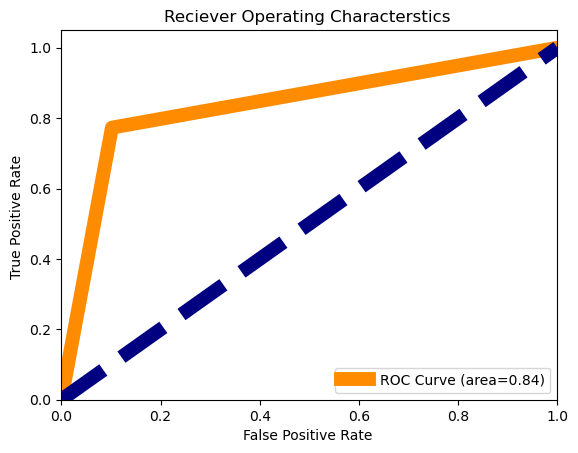

In [150]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve (area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.title("Reciever Operating Characterstics ")
plt.legend(loc='lower right')
plt.show()


So , here we are getting 84% accuracy.

# Lets save the Model

In [151]:
import pickle
filename='Hr'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [152]:
loaded_model=pickle.load(open('Hr','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

98.7152034261242


In [153]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,457,458,459,460,461,462,463,464,465,466
Predicted,1,1,1,0,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,1
Original,0,1,1,1,0,0,0,0,1,1,...,1,0,0,0,0,1,1,0,0,1


In [ ]:
#Student of DataTrained
#Student of DataScience -Saurav
#Date- 03-12-2022
#Time - 15:14